Fernando José Garavito Ovando 18071

Sebastián Maldonado Arnau 18003

# Laboratorio 1 Security Data Science

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

### Parte 1 - Ingeniería de características

In [2]:
df = pd.read_csv("dataset_pishing.csv")
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


legitimate    5715
phishing      5715
Name: status, dtype: int64


<AxesSubplot: >

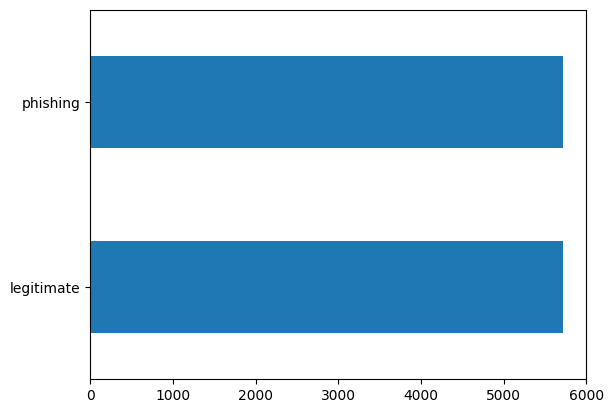

In [3]:
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='barh')

La data si esta balanceada

In [4]:
def getf1(s):
    return len(s)
def getf2(s):
    domain = s.split('//')[1].split('/')[0]
    return len(domain)
def getf4(s):
    return s.count('.')
def getf5(s):
    return s.count('-')
def getf6(s):
    return s.count('@')
def getf7(s):
    return s.count('?')
def getf8(s):
    return s.count('&')
def getf9(s):
    return s.count('|')
def getf10(s):
    return s.count('=')
def getf11(s):
    return s.count('_')
def getf12(s):
    return s.count('~')
def getf13(s):
    return s.count('%')
def getf14(s):
    return s.count('/')
def getf15(s):
    return s.count('*')
def getf16(s):
    return s.count(':')
def getf17(s):
    return s.count(',')
def getf18(s):
    return s.count(';')
def getf19(s):
    return s.count('$')
def getf20(s):
    return s.count('%20')
def getf25(s):
    return s[:5] == 'https'
def getf26(s):
    n = 0
    for c in s:
        if c.isdigit():
            n += 1
    return n/len(s)
def getf27(s):
    domain = s.split('//')[1].split('/')[0]
    n = 0
    for c in domain:
        if c.isdigit():
            n += 1
    return n/len(domain)
def statustobin(s):
    if s == 'phishing' or s == 1:
        return 1
    return 0

In [5]:
df['f1'] = df['url'].apply(getf1)
df['f2'] = df['url'].apply(getf2)
df['f4'] = df['url'].apply(getf4)
df['f5'] = df['url'].apply(getf5)
df['f6'] = df['url'].apply(getf6)
df['f7'] = df['url'].apply(getf7)
df['f8'] = df['url'].apply(getf8)
df['f9'] = df['url'].apply(getf9)
df['f10'] = df['url'].apply(getf10)
df['f11'] = df['url'].apply(getf11)
df['f12'] = df['url'].apply(getf12)
df['f13'] = df['url'].apply(getf13)
df['f14'] = df['url'].apply(getf14)
df['f15'] = df['url'].apply(getf15)
df['f16'] = df['url'].apply(getf16)
df['f17'] = df['url'].apply(getf17)
df['f18'] = df['url'].apply(getf18)
df['f19'] = df['url'].apply(getf19)
df['f20'] = df['url'].apply(getf20)
df['f25'] = df['url'].apply(getf25)
df['f26'] = df['url'].apply(getf26)
df['f27'] = df['url'].apply(getf27)
features = ['f1','f2','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f25','f26','f27']
df[['url',*features]].sample(5)

,url,f1,f2,f4,f5,f6,f7,f8,f9,f10,...,f14,f15,f16,f17,f18,f19,f20,f25,f26,f27
1516,http://ht.ly/Yu3l30qydcX,24,5,1,0,0,0,0,0,0,...,3,0,1,0,0,0,0,False,0.125000,0.000000
82,https://twitter.com/mimosagrillclt,34,11,1,0,0,0,0,0,0,...,3,0,1,0,0,0,0,True,0.000000,0.000000
1503,http://www-03.ibm.com/software/products/en/fin...,72,14,2,3,0,0,0,0,0,...,6,0,1,0,0,0,0,False,0.027778,0.142857
2760,https://www.tessafowler.com/,28,19,2,0,0,0,0,0,0,...,3,0,1,0,0,0,0,True,0.000000,0.000000
1483,http://www.yourdictionary.com/automation,40,22,2,0,0,0,0,0,0,...,3,0,1,0,0,0,0,False,0.000000,0.000000


In [6]:
df['status'] = df['status'].apply(statustobin)
df.drop('url', inplace=True,axis=1)

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file('Reporte.html')

In [7]:
# constantes
df.drop('ratio_nullHyperlinks', inplace=True, axis=1)
df.drop('ratio_intRedirection', inplace=True, axis=1)
df.drop('ratio_intErrors', inplace=True, axis=1)
df.drop('submit_email', inplace=True, axis=1)
df.drop('sfh', inplace=True, axis=1)
df.drop('f9', inplace=True, axis=1)
#duplicados
df.drop_duplicates()
#baja correlación
df.drop('onmouseover', inplace=True, axis=1)
df.drop('right_clic', inplace=True, axis=1)
df.drop('nb_redirection', inplace=True, axis=1)
df.drop('nb_extCSS', inplace=True, axis=1)
df.drop('f13', inplace=True, axis=1)
df.drop('f20', inplace=True, axis=1)
df.drop('punycode', inplace=True, axis=1)
df.drop('port', inplace=True, axis=1)
df.drop('random_domain', inplace=True, axis=1)
df.drop('path_extension', inplace=True, axis=1)
df.drop('login_form', inplace=True, axis=1)
df.drop('iframe', inplace=True, axis=1)
df.drop('f12', inplace=True, axis=1)
df.drop('f15', inplace=True, axis=1)
df.drop('f17', inplace=True, axis=1)
df.drop('f19', inplace=True, axis=1)

### Parte 2 - Implementación